In [10]:
import pickle
import os
import numpy as np

cifar_folder = 'cifar-10-batches-py'

labels_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 
    'frog', 'horse', 'ship', 'truck']
print(labels_names)

def load_cifar_batch(folder, file):
    with open(os.path.join(folder, file), 'rb') as f:
        dict = pickle.load(f, encoding='bytes')
    print(dict[b'batch_label'])
    return dict[b'data'], np.array(dict[b'labels'])

def load_cifar(folder):
    x_tr = list()
    y_tr = list()
    for i in range(1, 6):
        x, y = load_cifar_batch(folder, 'data_batch_' + str(i))
        x_tr.append(x)
        y_tr.append(y)
    x_tr = np.concatenate(x_tr)
    y_tr = np.concatenate(y_tr)
    x_te, y_te = load_cifar_batch(folder, 'test_batch')
    return x_tr, y_tr, x_te, y_te

x_tr, y_tr, x_te, y_te = load_cifar(cifar_folder)
print(x_tr.shape, y_tr.shape, x_te.shape, y_te.shape)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
b'training batch 1 of 5'
b'training batch 2 of 5'
b'training batch 3 of 5'
b'training batch 4 of 5'
b'training batch 5 of 5'
b'testing batch 1 of 1'
(50000, 3072) (50000,) (10000, 3072) (10000,)


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display

def plot_image(x, y):
    plt.imshow(x.reshape(3, 32, 32).transpose(1, 2, 0) / 256)
    plt.title(labels_names[y])
    plt.axis('off')

def show_image(x, y):
    plot_image(x, y)
    plt.show()

def show_train_image(index):
    show_image(x_tr[index], y_tr[index])

silence = interact(show_train_image, index=widgets.IntSlider(min=0, max=20, step=1, value=0))

A Jupyter Widget

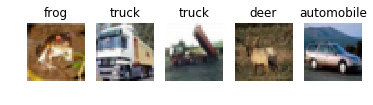

In [8]:
def show_stacked(xs, ys):
    n = len(xs)
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plot_image(xs[i], ys[i])
    plt.show()
    
show_stacked(x_tr[:5], y_tr[:5])

In [12]:
from collections import Counter

def show_k_neighbours(index):
    x_curr = x_te[index]
    y_curr = y_te[index]
    show(x_curr, y_curr)
    distances = np.sum(np.abs(x_tr - x_curr), axis = 1)
    top = distances.argsort()[:5]
    x_top = x_tr[top]
    y_top = y_tr[top]
    show_stacked(x_top, y_top)
    y_pred = max(Counter(y_top).items(), key=lambda x: x[1])[0]
    print(labels_names[y_pred])

silence = interact(show_k_neighbours, index=widgets.IntSlider(min=0, max=20, step=1, value=0))

A Jupyter Widget

In [235]:
import sys

def predict_by_nearest(n):
    y_pred = np.zeros(n, dtype = y_tr.dtype)
    for i in range(n):
        distances = np.sum(np.abs(x_tr - x_te[i,:]), axis = 1)
        min_index = np.argmin(distances) # get the index with smallest distance
        y_pred[i] = y_tr[min_index] # predict the label of the nearest example
        sys.stdout.write('\rProcess: %d of %d' % (i, n))
        sys.stdout.flush()
    print('. Complete.')
    return y_pred

y_pred = predict_by_nearest(1000)
print(np.mean(y_pred == y_te[:1000]))

Process: 999 of 1000. Complete.
0.253


In [233]:
def predict_k_neighbours(n, k):
    y_pred = np.zeros(n, dtype = y_tr.dtype)
    for i in range(n):
        distances = np.sum(np.abs(x_tr - x_te[i,:]), axis = 1)
        top = distances.argsort()[:k]
        y_top = y_tr[top]
        y_pred[i] = max(Counter(y_top).items(), key=lambda x: x[1])[0]
        sys.stdout.write('\rProcess: %d of %d' % (i, n))
        sys.stdout.flush()
    print('. Complete.')
    return y_pred

y_pred = predict_k_neighbours(1000, 5)
print(np.mean(y_pred == y_te[:1000]))

0.315
